In [2]:
from multi_modal_edge_ai.models.anomaly_detection.data_access.parser import parse_file_with_idle
from multi_modal_edge_ai.models.anomaly_detection.ml_models.local_outlier_factor import LOF
from multi_modal_edge_ai.models.anomaly_detection.ml_models.isolation_forest import IForest
from multi_modal_edge_ai.models.anomaly_detection.ml_models.one_class_svm import OCSVM
from multi_modal_edge_ai.models.anomaly_detection.ml_models.autoencoder import Autoencoder
from multi_modal_edge_ai.models.anomaly_detection.ml_models.lstm_autoencoder import LSTMAutoencoder
from multi_modal_edge_ai.models.anomaly_detection.train_and_eval.model_validator import model_train_eval
from multi_modal_edge_ai.models.anomaly_detection.train_and_eval.hyperparameter_config import HyperparameterConfig as Hparams
import torch.nn as nn


data = parse_file_with_idle("../../public_datasets/Aruba_Idle_Squashed.csv")

In [2]:
 # Basic LOF model with changed hyperparameters
# Novelty set to True means that the model will use LocalOutlierFactor for novelty detection and data is outlier-free during training

lof = LOF()
lofParams = {
    "n_neighbors": 300,
    "algorithm": "auto",
    "leaf_size": 40,
    "metric": "minkowski",
    "p": 2,
    "contamination": "auto",
    "novelty": True
}

hp = Hparams(lof_hparams=lofParams, clean_test_data_ratio = 0.1,
             window_size= 8, window_slide= 1, one_hot=False)
(avg, cm) = model_train_eval(lof, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp/(2 * tp + fp + fn))


clean_df: 8890 anomalous_df: 729
5
0.5905411163187048
[[1376   82]
 [ 879   10]]
Accuracy:  0.5905411163187048
Precision:  0.943758573388203
Recall:  0.61019955654102
F1:  0.7411796391058443


In [3]:
# Basic LOF model with changed hyperparameters and Novelty set to True and batch size of 16
# Novelty set to True means that the model will use LocalOutlierFactor for novelty detection and data is outlier-free during training

lof = LOF()
lofParams = {
    "n_neighbors": 4000,
    "algorithm": "auto",
    "leaf_size": 400,
    "metric": "minkowski",
    "p": 2,
    "contamination": 0.001,
    "novelty": True
}

hp = Hparams(lof_hparams=lofParams, clean_test_data_ratio = 0.15, window_size= 8, window_slide= 1)
(avg, cm) = model_train_eval(lof, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp/(2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
12
0.5069867431028305
[[ 111 1347]
 [  29 1304]]
Accuracy:  0.5069867431028305
Precision:  0.07613168724279835
Recall:  0.7928571428571428
F1:  0.13892365456821026


In [4]:
# Basic LOF model with changed hyperparameters and Novelty set to True and batch size of 64
# Novelty set to True means that the model will use LocalOutlierFactor for novelty detection and data is outlier-free during training

lof = LOF()
lofParams = {
    "n_neighbors": 2000,
    "algorithm": "auto",
    "leaf_size": 300,
    "metric": "minkowski",
    "p": 2,
    "contamination": "auto",
    "novelty": True
}

hp = Hparams(lof_hparams=lofParams, clean_test_data_ratio = 0.15, window_size= 8, window_slide= 1, one_hot=False)
(avg, cm) = model_train_eval(lof, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp/(2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
5
0.5206019347903977
[[ 166 1292]
 [  46 1287]]
Accuracy:  0.5206019347903977
Precision:  0.11385459533607682
Recall:  0.7830188679245284
F1:  0.19880239520958085


In [ ]:
iforest = IForest()

iforestParams = {
    "n_estimators": 1000,
    "max_samples": "auto",
    "contamination": 0.1,
    "max_features": 1.0,
    "bootstrap": False,
    "n_jobs": -1,
    "random_state": 42,
    "verbose": 0,
}

hp = Hparams(i_forest_hparams=iforestParams, window_size= 8, window_slide= 1, one_hot=False)
(avg, cm) = model_train_eval(iforest, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp/(2 * tp + fp + fn))

In [4]:
ocsvm = OCSVM()

ovscmParams = {
    "kernel": "rbf",
    "degree": 3,
    "gamma": "scale",
    "coef0": 0.0,
    "tol": 0.001,
    "nu": 0.01,
    "shrinking": True,
    "cache_size": 2400,
    "verbose": False,
    "max_iter": -1,
}

hp = Hparams(ocsvm_hparams=ovscmParams, anomaly_generation_ratio = 11, clean_test_data_ratio = 0.25,window_size= 8, window_slide= 1,one_hot=False)
(avg, cm) = model_train_eval(ocsvm, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp/(2 * tp + fp + fn))


clean_df: 8890 anomalous_df: 729
5
[1 0 1 ... 1 1 0]
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0

In [7]:
autoenc = Autoencoder([96,64,32,16], [16,32,64,96],nn.ReLU(), nn.Sigmoid())

hp = Hparams(batch_size=16,  n_epochs=10, anomaly_generation_ratio = 11, clean_test_data_ratio=0.2, window_size= 8, window_slide= 1)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
12
Epoch 1 training loss: 0.05389717221260071
Epoch 2 training loss: 0.030980540439486504
Epoch 3 training loss: 0.023487167432904243
Epoch 4 training loss: 0.020996732637286186
Epoch 5 training loss: 0.019222674891352654
Epoch 6 training loss: 0.017535774037241936
Epoch 7 training loss: 0.016274292021989822
Epoch 8 training loss: 0.01566317304968834
Epoch 9 training loss: 0.015262589789927006
Epoch 10 training loss: 0.014593065716326237
0.2847235417062512
[[1318 7430]
 [  99 1679]]
Accuracy: 0.2847235417062512
Precision:  0.1843231968382918
Recall:  0.9443194600674916
F1:  0.30844126021860935


In [9]:
autoenc = Autoencoder([40, 32, 16, 8], [8, 16, 32, 40], nn.ReLU(), nn.Sigmoid())

hp = Hparams(batch_size=32, n_epochs=16, clean_test_data_ratio=0.2,window_size=8, window_slide=1, one_hot=False)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
5
[0 0 0 ... 1 0 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [2]:
ltsm = LSTMAutoencoder(12, 8, 8, 16, 16)

hp = Hparams(batch_size=16, n_epochs=32, clean_test_data_ratio=0.2, window_size=8, window_slide=1, one_hot=True)

(avg, cm) = model_train_eval(ltsm, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))


clean_df: 8890 anomalous_df: 729
12
Epoch 1 training loss: 0.07760713093037244
Epoch 2 training loss: 0.07725755977669586
Epoch 3 training loss: 0.0772386808702628
Epoch 4 training loss: 0.07725333552849474
Epoch 5 training loss: 0.07720437902104449
Epoch 6 training loss: 0.07721456329896627
Epoch 7 training loss: 0.0772136117869106
Epoch 8 training loss: 0.07721375107463486
Epoch 9 training loss: 0.07718426470631153
Epoch 10 training loss: 0.07720113484895001
Epoch 11 training loss: 0.07719907346490616
Epoch 12 training loss: 0.07718318898107174
Epoch 13 training loss: 0.07717363352660002
Epoch 14 training loss: 0.07718654360969973
Epoch 15 training loss: 0.07717847603837319
Epoch 16 training loss: 0.07719744948766648
Epoch 17 training loss: 0.07721296846458041
Epoch 18 training loss: 0.07720602415680164
Epoch 19 training loss: 0.07716414992486968
Epoch 20 training loss: 0.07716112782344792
Epoch 21 training loss: 0.07718445156324819
Epoch 22 training loss: 0.07716832268737986
Epoch 2

In [ ]:
# Grid search for OCSVM
ocsvm = OCSVM()

kernels = ["rbf", "linear", "poly", "sigmoid"]
degrees = [3, 4, 5]
gammas = ["scale", "auto"]
coef0s = [0.0, 0.1, 0.2, 0.3]
tols = [0.0001, 0.00001]

for k in kernels:
    for d in degrees:
        for g in gammas:
            for c in coef0s:
                for t in tols:
                    ovscmParams = {
                        "kernel": k,
                        "degree": d if k == "poly" else 3,
                        "gamma": g,
                        "coef0": c if k == "poly" or k == "sigmoid" else 0.0,
                        "tol": t,
                        "nu": 0.001,
                        "shrinking": True,
                        "cache_size": 3200,
                        "verbose": False,
                        "max_iter": -1,
                    }

                    hp = Hparams(ocsvm_hparams=ovscmParams, anomaly_generation_ratio=11,
                                 clean_test_data_ratio=0.25, window_size=8, window_slide=1,
                                 one_hot=False)
                    (avg, cm) = model_train_eval(ocsvm, data, hp)
                    print("for kernel: ", k, " degree: ", d, " gamma: ", g, " coef0: ", c, " tol: ", t)
                    print(avg)
                    print(cm)
                    (tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
                    print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
                    print("Precision: ", tp / (tp + fp))
                    print("Recall: ", tp / (tp + fn))
                    print("F1: ", 2 * tp / (2 * tp + fp + fn))
                    print("---------------------------------------------------")

clean_df: 8890 anomalous_df: 729
5
for kernel:  rbf  degree:  3  gamma:  scale  coef0:  0.0  tol:  0.0001
0.7262534184138559
[[6972 1776]
 [1227  995]]
Accuracy:  0.7262534184138559
Precision:  0.3590761457957416
Recall:  0.44779477947794777
F1:  0.3985579811736431
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for kernel:  rbf  degree:  3  gamma:  scale  coef0:  0.0  tol:  1e-05
0.697538742023701
[[6620 2128]
 [1190 1032]]
Accuracy:  0.697538742023701
Precision:  0.3265822784810127
Recall:  0.46444644464446444
F1:  0.3835005574136009
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for kernel:  rbf  degree:  3  gamma:  scale  coef0:  0.1  tol:  0.0001
0.7302643573381951
[[6966 1782]
 [1177 1045]]
Accuracy:  0.7302643573381951
Precision:  0.36964980544747084
Recall:  0.47029702970297027
F1:  0.4139433551198257
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for kernel:  

In [4]:
ocsvm = OCSVM()

ovscmParams = {
    "kernel": "rbf",
    "degree": 3,
    "gamma": "scale",
    "coef0": 0.0,
    "tol": 0.0001,
    "nu": 0.001,
    "shrinking": True,
    "cache_size": 2800,
    "verbose": False,
    "max_iter": -1,
}

hp = Hparams(ocsvm_hparams=ovscmParams, anomaly_generation_ratio = 11, clean_test_data_ratio = 0.30,window_size= 8, window_slide= 1,one_hot=False)
(avg, cm) = model_train_eval(ocsvm, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp/(2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
5
0.6910205869469995
[[6581 2167]
 [1360 1307]]
Accuracy:  0.6910205869469995
Precision:  0.37622337363270003
Recall:  0.49006374203224595
F1:  0.425663572708028


In [10]:
# Grid search OCSVM with poly with anomalies being 10% of the data

ocsvm = OCSVM()

degrees = [3, 4, 5]
gammas = ["scale", "auto"]
coef0s = [0.0, 0.1, 0.2, 0.3]
tols = [0.001, 0.0001]

for d in degrees:
    for g in gammas:
        for c in coef0s:
            for t in tols:
                ovscmParams = {
                    "kernel": "poly",
                    "degree": d,
                    "gamma": g,
                    "coef0": c,
                    "tol": t,
                    "nu": 0.001,
                    "shrinking": True,
                    "cache_size": 3200,
                    "verbose": False,
                    "max_iter": -1,
                }

                hp = Hparams(ocsvm_hparams=ovscmParams, anomaly_generation_ratio=0.01,
                             clean_test_data_ratio=0.25, window_size=8, window_slide=1,
                             one_hot=False)
                (avg, cm) = model_train_eval(ocsvm, data, hp)
                print("for degree: ", d, " gamma: ", g, " coef0: ", c, " tol: ", t)
                print(avg)
                print(cm)
                (tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
                print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
                print("Precision: ", tp / (tp + fp))
                print("Recall: ", tp / (tp + fn))
                print("F1: ", 2 * tp / (2 * tp + fp + fn))
                print("---------------------------------------------------")


clean_df: 8890 anomalous_df: 729
5
for degree:  3  gamma:  scale  coef0:  0.0  tol:  0.001
0.6089673913043478
[[  26 1432]
 [   7 2215]]
Accuracy:  0.6089673913043478
Precision:  0.6073485056210584
Recall:  0.9968496849684968
F1:  0.7548134264781053
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for degree:  3  gamma:  scale  coef0:  0.0  tol:  0.0001
0.6097826086956522
[[  23 1435]
 [   1 2221]]
Accuracy:  0.6097826086956522
Precision:  0.6074945295404814
Recall:  0.9995499549954996
F1:  0.7556992174208914
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for degree:  3  gamma:  scale  coef0:  0.1  tol:  0.001
0.6095108695652174
[[  21 1437]
 [   0 2222]]
Accuracy:  0.6095108695652174
Precision:  0.6072697458321946
Recall:  1.0
F1:  0.755653800374086
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for degree:  3  gamma:  scale  coef0:  0.1  tol:  0.0001
0.610326086956521

In [8]:
ocsvm = OCSVM()

ovscmParams = {
    "kernel": "poly",
    "degree": 5,
    "gamma": "scale",
    "coef0": 0.3,
    "tol": 0.001,
    "nu": 0.001,
    "shrinking": True,
    "cache_size": 2800,
    "verbose": False,
    "max_iter": -1,
}

hp = Hparams(ocsvm_hparams=ovscmParams, anomaly_generation_ratio = 0.01, clean_test_data_ratio = 0.30,window_size= 8, window_slide= 1,one_hot=False)
(avg, cm) = model_train_eval(ocsvm, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp/(2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
5
0.6518787878787878
[[  23 1435]
 [   1 2666]]
Accuracy:  0.6518787878787878
Precision:  0.6500853450377957
Recall:  0.9996250468691413
F1:  0.7878250591016549


In [9]:
# Grid search for LOF

lof = LOF()

n_neighbors = [1500,2000,2500,3000]
leaf_sizes = [200,250,300,350]

for n in n_neighbors:
    for l in leaf_sizes:
        lofParams = {
            "n_neighbors": n,
            "algorithm": "auto",
            "leaf_size": l,
            "metric": "minkowski",
            "p": 2,
            "metric_params": None,
            "contamination": "auto",
            "novelty": True,
            "n_jobs": -1,
        }

        hp = Hparams(lof_hparams=lofParams, anomaly_generation_ratio = 0.01, clean_test_data_ratio = 0.30,window_size= 8, window_slide= 1,one_hot=False)
        (avg, cm) = model_train_eval(lof, data, hp)
        print("for n_neighbors: ", n, " leaf_size: ", l)
        print(avg)
        print(cm)
        (tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
        print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
        print("Precision: ", tp / (tp + fp))
        print("Recall: ", tp / (tp + fn))
        print("F1: ", 2 * tp / (2 * tp + fp + fn))
        print("---------------------------------------------------")


clean_df: 8890 anomalous_df: 729
5
for n_neighbors:  1500  leaf_size:  200
0.6681212121212121
[[ 217 1241]
 [ 128 2539]]
Accuracy:  0.6681212121212121
Precision:  0.6716931216931217
Recall:  0.9520059992500938
F1:  0.7876531720179929
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for n_neighbors:  1500  leaf_size:  250
0.6678787878787878
[[ 213 1245]
 [ 125 2542]]
Accuracy:  0.6678787878787878
Precision:  0.6712437285450225
Recall:  0.9531308586426697
F1:  0.7877285404400372
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for n_neighbors:  1500  leaf_size:  300
0.6693333333333333
[[ 215 1243]
 [ 121 2546]]
Accuracy:  0.6693333333333333
Precision:  0.6719451042491422
Recall:  0.9546306711661042
F1:  0.788723667905824
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for n_neighbors:  1500  leaf_size:  350
0.6676363636363636
[[ 210 1248]
 [ 123 2544]]
Accuracy:  0.667636363

In [11]:
# Grid search OCSVM with poly with anomalies being 50% of the data and one_hot=False

ocsvm = OCSVM()

degrees = [2,3,4]
gammas = ["scale", "auto"]
coef0s = [0.0, 0.1, 0.2, 0.3]
tols = [0.001, 0.0001]

for d in degrees:
    for g in gammas:
        for c in coef0s:
            for t in tols:
                ovscmParams = {
                    "kernel": "poly",
                    "degree": d,
                    "gamma": g,
                    "coef0": c,
                    "tol": t,
                    "nu": 0.001,
                    "shrinking": True,
                    "cache_size": 3200,
                    "verbose": False,
                    "max_iter": -1,
                }

                hp = Hparams(ocsvm_hparams=ovscmParams, anomaly_generation_ratio=10,
                             clean_test_data_ratio=0.25, window_size=8, window_slide=1,
                             one_hot=False)
                (avg, cm) = model_train_eval(ocsvm, data, hp)
                print("for degree: ", d, " gamma: ", g, " coef0: ", c, " tol: ", t)
                print(avg)
                print(cm)
                (tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
                print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
                print("Precision: ", tp / (tp + fp))
                print("Recall: ", tp / (tp + fn))
                print("F1: ", 2 * tp / (2 * tp + fp + fn))
                print("---------------------------------------------------")


clean_df: 8890 anomalous_df: 729
5
for degree:  2  gamma:  scale  coef0:  0.0  tol:  0.001
0.22790743091494972
[[ 112 7907]
 [   0 2222]]
Accuracy:  0.22790743091494972
Precision:  0.21937012538256492
Recall:  1.0
F1:  0.3598089223544652
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for degree:  2  gamma:  scale  coef0:  0.0  tol:  0.0001
0.22820037105751392
[[ 116 7903]
 [   1 2221]]
Accuracy:  0.22820037105751392
Precision:  0.21937969182141445
Recall:  0.9995499549954996
F1:  0.3597926453912198
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for degree:  2  gamma:  scale  coef0:  0.1  tol:  0.001
0.22771213748657357
[[ 110 7909]
 [   0 2222]]
Accuracy:  0.22771213748657357
Precision:  0.21932681867535286
Recall:  1.0
F1:  0.3597506678539626
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for degree:  2  gamma:  scale  coef0:  0.1  tol:  0.0001
0.22800507762913777
[[

KeyboardInterrupt: 

In [12]:
# Autoencoder with 50% anomalies and one_hot=False
autoenc = Autoencoder([40, 32, 16, 8], [8, 16, 32, 40], nn.ReLU(), nn.Sigmoid())

hp = Hparams(batch_size=8, n_epochs=32, anomaly_generation_ratio=10, clean_test_data_ratio=0.2, window_size=8, window_slide=1, one_hot=False)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
5
Epoch 1 training loss: 0.03566889837384224
Epoch 2 training loss: 0.01830665022134781
Epoch 3 training loss: 0.013418372720479965
Epoch 4 training loss: 0.011778959073126316
Epoch 5 training loss: 0.01130879856646061
Epoch 6 training loss: 0.011056452058255672
Epoch 7 training loss: 0.01079351082444191
Epoch 8 training loss: 0.010838769376277924
Epoch 9 training loss: 0.010137386620044708
Epoch 10 training loss: 0.010338276624679565
Epoch 11 training loss: 0.010535934008657932
Epoch 12 training loss: 0.009792396798729897
Epoch 13 training loss: 0.009921427816152573
Epoch 14 training loss: 0.009429894387722015
Epoch 15 training loss: 0.008734602481126785
Epoch 16 training loss: 0.009123115800321102
Epoch 17 training loss: 0.009666664525866508
Epoch 18 training loss: 0.008979364298284054
Epoch 19 training loss: 0.009243450127542019
Epoch 20 training loss: 0.008844000287353992
Epoch 21 training loss: 0.00910976342856884
Epoch 22 training loss: 0.00884023

/var/folders/s8/4smfbzk97dvdhsvkx0y_yb5c0000gp/T/ipykernel_98989/868071132.py:10: RuntimeWarning: invalid value encountered in scalar divide
  print("Precision: ", tp / (tp + fp))


In [ ]:
# Grid search for Isolation Forest

iforest = IForest()

n_estimators = [100, 200, 400, 800]
bootstraps = [True, False]
onehots = [True, False]
for n in n_estimators:
    for b in bootstraps:
        for o in onehots:
            iforestParams = {
                "n_estimators": n,
                "max_samples": "auto",
                "contamination": "auto",
                "max_features": 1.0,
                "bootstrap": b,
                "n_jobs": -1,
                "random_state": None,
                "verbose": False,
            }

            hp = Hparams(i_forest_hparams=iforestParams, anomaly_generation_ratio = 0.01, clean_test_data_ratio = 0.25, window_size= 8, window_slide= 1,one_hot=o)
            (avg, cm) = model_train_eval(iforest, data, hp)
            print("for n_estimators: ", n, " bootstrap: ", b)
            print(avg)
            print(cm)
            (tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
            print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
            print("Precision: ", tp / (tp + fp))
            print("Recall: ", tp / (tp + fn))
            print("F1: ", 2 * tp / (2 * tp + fp + fn))
            print("---------------------------------------------------")





clean_df: 8890 anomalous_df: 729
12
for n_estimators:  100  bootstrap:  True
0.4315217391304348
[[1457    1]
 [2091  131]]
Accuracy:  0.4315217391304348
Precision:  0.9924242424242424
Recall:  0.05895589558955896
F1:  0.11129991503823279
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for n_estimators:  100  bootstrap:  True
0.39619565217391306
[[1458    0]
 [2222    0]]
Accuracy:  0.39619565217391306
Precision:  nan
Recall:  0.0
F1:  0.0
---------------------------------------------------


/var/folders/s8/4smfbzk97dvdhsvkx0y_yb5c0000gp/T/ipykernel_98989/876659177.py:29: RuntimeWarning: invalid value encountered in scalar divide
  print("Precision: ", tp / (tp + fp))


clean_df: 8890 anomalous_df: 729
12
for n_estimators:  100  bootstrap:  False
0.5076086956521739
[[1426   32]
 [1780  442]]
Accuracy:  0.5076086956521739
Precision:  0.9324894514767933
Recall:  0.19891989198919893
F1:  0.327893175074184
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for n_estimators:  100  bootstrap:  False
0.39619565217391306
[[1458    0]
 [2222    0]]
Accuracy:  0.39619565217391306
Precision:  nan
Recall:  0.0
F1:  0.0
---------------------------------------------------


/var/folders/s8/4smfbzk97dvdhsvkx0y_yb5c0000gp/T/ipykernel_98989/876659177.py:29: RuntimeWarning: invalid value encountered in scalar divide
  print("Precision: ", tp / (tp + fp))


clean_df: 8890 anomalous_df: 729
12
for n_estimators:  200  bootstrap:  True
0.40054347826086956
[[1458    0]
 [2206   16]]
Accuracy:  0.40054347826086956
Precision:  1.0
Recall:  0.0072007200720072
F1:  0.014298480786416443
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for n_estimators:  200  bootstrap:  True
0.39619565217391306
[[1458    0]
 [2222    0]]
Accuracy:  0.39619565217391306
Precision:  nan
Recall:  0.0
F1:  0.0
---------------------------------------------------


/var/folders/s8/4smfbzk97dvdhsvkx0y_yb5c0000gp/T/ipykernel_98989/876659177.py:29: RuntimeWarning: invalid value encountered in scalar divide
  print("Precision: ", tp / (tp + fp))


clean_df: 8890 anomalous_df: 729
12
for n_estimators:  200  bootstrap:  False
0.41440217391304346
[[1454    4]
 [2151   71]]
Accuracy:  0.41440217391304346
Precision:  0.9466666666666667
Recall:  0.03195319531953195
F1:  0.06181976491075316
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for n_estimators:  200  bootstrap:  False
0.39619565217391306
[[1458    0]
 [2222    0]]
Accuracy:  0.39619565217391306
Precision:  nan
Recall:  0.0
F1:  0.0
---------------------------------------------------


/var/folders/s8/4smfbzk97dvdhsvkx0y_yb5c0000gp/T/ipykernel_98989/876659177.py:29: RuntimeWarning: invalid value encountered in scalar divide
  print("Precision: ", tp / (tp + fp))


clean_df: 8890 anomalous_df: 729
12
for n_estimators:  400  bootstrap:  True
0.39918478260869567
[[1458    0]
 [2211   11]]
Accuracy:  0.39918478260869567
Precision:  1.0
Recall:  0.0049504950495049506
F1:  0.009852216748768473
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for n_estimators:  400  bootstrap:  True
0.39619565217391306
[[1458    0]
 [2222    0]]
Accuracy:  0.39619565217391306
Precision:  nan
Recall:  0.0
F1:  0.0
---------------------------------------------------


/var/folders/s8/4smfbzk97dvdhsvkx0y_yb5c0000gp/T/ipykernel_98989/876659177.py:29: RuntimeWarning: invalid value encountered in scalar divide
  print("Precision: ", tp / (tp + fp))


clean_df: 8890 anomalous_df: 729
12
for n_estimators:  400  bootstrap:  False
0.4008152173913043
[[1458    0]
 [2205   17]]
Accuracy:  0.4008152173913043
Precision:  1.0
Recall:  0.00765076507650765
F1:  0.015185350602947744
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for n_estimators:  400  bootstrap:  False
0.39619565217391306
[[1458    0]
 [2222    0]]
Accuracy:  0.39619565217391306
Precision:  nan
Recall:  0.0
F1:  0.0
---------------------------------------------------


/var/folders/s8/4smfbzk97dvdhsvkx0y_yb5c0000gp/T/ipykernel_98989/876659177.py:29: RuntimeWarning: invalid value encountered in scalar divide
  print("Precision: ", tp / (tp + fp))


clean_df: 8890 anomalous_df: 729
12
for n_estimators:  800  bootstrap:  True
0.4016304347826087
[[1458    0]
 [2202   20]]
Accuracy:  0.4016304347826087
Precision:  1.0
Recall:  0.009000900090009001
F1:  0.01784121320249777
---------------------------------------------------
clean_df: 8890 anomalous_df: 729
5
for n_estimators:  800  bootstrap:  True
0.39619565217391306
[[1458    0]
 [2222    0]]
Accuracy:  0.39619565217391306
Precision:  nan
Recall:  0.0
F1:  0.0
---------------------------------------------------


/var/folders/s8/4smfbzk97dvdhsvkx0y_yb5c0000gp/T/ipykernel_98989/876659177.py:29: RuntimeWarning: invalid value encountered in scalar divide
  print("Precision: ", tp / (tp + fp))


clean_df: 8890 anomalous_df: 729
12
for n_estimators:  800  bootstrap:  False
0.3967391304347826
[[1458    0]
 [2220    2]]
Accuracy:  0.3967391304347826
Precision:  1.0
Recall:  0.0009000900090009
F1:  0.0017985611510791368
---------------------------------------------------


In [3]:
# Autoencoder with 50% anomalies and one_hot=False
autoenc = Autoencoder([40, 32, 24, 16, 8], [8, 16, 24, 32, 40], nn.ReLU(), nn.Sigmoid())

hp = Hparams(batch_size=8, n_epochs=32, anomaly_generation_ratio=11, clean_test_data_ratio=0.3, window_size=8, window_slide=1, one_hot=False)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
5
Epoch 1 training loss: 0.04122960567474365
Epoch 2 training loss: 0.032301533967256546
Epoch 3 training loss: 0.029458846896886826
Epoch 4 training loss: 0.029231302440166473
Epoch 5 training loss: 0.026410769671201706
Epoch 6 training loss: 0.024050837382674217
Epoch 7 training loss: 0.02383429929614067
Epoch 8 training loss: 0.02304689958691597
Epoch 9 training loss: 0.023099087178707123
Epoch 10 training loss: 0.022938374429941177
Epoch 11 training loss: 0.021551033481955528
Epoch 12 training loss: 0.020283041521906853
Epoch 13 training loss: 0.019526956602931023
Epoch 14 training loss: 0.018245210871100426
Epoch 15 training loss: 0.01643492467701435
Epoch 16 training loss: 0.01508433185517788
Epoch 17 training loss: 0.014789544977247715
Epoch 18 training loss: 0.014925693161785603
Epoch 19 training loss: 0.013959605246782303
Epoch 20 training loss: 0.014511987566947937
Epoch 21 training loss: 0.014036488719284534
Epoch 22 training loss: 0.01356128

In [4]:
# Autoencoder with 50% anomalies and one_hot=True
autoenc = Autoencoder([96, 64, 32, 24, 16, 8], [8, 16, 24, 32, 64, 96], nn.ReLU(), nn.Sigmoid())

hp = Hparams(batch_size=8, n_epochs=64, anomaly_generation_ratio=10, clean_test_data_ratio=0.3, window_size=8,
             window_slide=1, one_hot=True)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
12
Epoch 1 training loss: 0.058898258954286575
Epoch 2 training loss: 0.05155443772673607
Epoch 3 training loss: 0.05057140812277794
Epoch 4 training loss: 0.04858234152197838
Epoch 5 training loss: 0.04724820703268051
Epoch 6 training loss: 0.04657506197690964
Epoch 7 training loss: 0.045772116631269455
Epoch 8 training loss: 0.045489318668842316
Epoch 9 training loss: 0.045221779495477676
Epoch 10 training loss: 0.04497319832444191
Epoch 11 training loss: 0.043941523879766464
Epoch 12 training loss: 0.04381180927157402
Epoch 13 training loss: 0.04358973726630211
Epoch 14 training loss: 0.043723657727241516
Epoch 15 training loss: 0.04434793069958687
Epoch 16 training loss: 0.04259477183222771
Epoch 17 training loss: 0.04313371703028679
Epoch 18 training loss: 0.04417560249567032
Epoch 19 training loss: 0.04458608478307724
Epoch 20 training loss: 0.04394195228815079
Epoch 21 training loss: 0.04413234442472458
Epoch 22 training loss: 0.04372331127524376

In [5]:
# Autoencoder with 10% anomalies and one_hot=True

autoenc = Autoencoder([96, 64, 32, 24, 16, 8], [8, 16, 24, 32, 64, 96], nn.ReLU(), nn.Sigmoid())

hp = Hparams(batch_size=8, n_epochs=256, anomaly_generation_ratio=0.01, clean_test_data_ratio=0.3, window_size=8,
             window_slide=1, one_hot=True)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
12
Epoch 1 training loss: 0.05829282104969025
Epoch 2 training loss: 0.05097535252571106
Epoch 3 training loss: 0.0498952753841877
Epoch 4 training loss: 0.04790065810084343
Epoch 5 training loss: 0.04763051122426987
Epoch 6 training loss: 0.0501713901758194
Epoch 7 training loss: 0.05156087875366211
Epoch 8 training loss: 0.04860074445605278
Epoch 9 training loss: 0.04710253328084946
Epoch 10 training loss: 0.04843513295054436
Epoch 11 training loss: 0.04762199521064758
Epoch 12 training loss: 0.0470193512737751
Epoch 13 training loss: 0.04710486903786659
Epoch 14 training loss: 0.04916980862617493
Epoch 15 training loss: 0.047472093254327774
Epoch 16 training loss: 0.045982830226421356
Epoch 17 training loss: 0.047718703746795654
Epoch 18 training loss: 0.046799905598163605
Epoch 19 training loss: 0.0502435639500618
Epoch 20 training loss: 0.05604420229792595
Epoch 21 training loss: 0.05407804250717163
Epoch 22 training loss: 0.05319788679480553
Epoch

In [7]:
# Autoencoder with 10% anomalies and one_hot=True

autoenc = Autoencoder([96, 64, 32, 24, 16, 8], [8, 16, 24, 32, 64, 96], nn.ReLU(), nn.Sigmoid())

hp = Hparams(batch_size=8, n_epochs=64, anomaly_generation_ratio=0.01, clean_test_data_ratio=0.3, learning_rate=0.001, window_size=8, window_slide=1, one_hot=True)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))


clean_df: 8890 anomalous_df: 729
12
Epoch 1 training loss: 0.07081352174282074
Epoch 2 training loss: 0.05177604779601097
Epoch 3 training loss: 0.04481825605034828
Epoch 4 training loss: 0.042032934725284576
Epoch 5 training loss: 0.03975117206573486
Epoch 6 training loss: 0.036157939583063126
Epoch 7 training loss: 0.03292706608772278
Epoch 8 training loss: 0.030977612361311913
Epoch 9 training loss: 0.029723944142460823
Epoch 10 training loss: 0.028918273746967316
Epoch 11 training loss: 0.02801123820245266
Epoch 12 training loss: 0.027473557740449905
Epoch 13 training loss: 0.02687661163508892
Epoch 14 training loss: 0.026449065655469894
Epoch 15 training loss: 0.02608298324048519
Epoch 16 training loss: 0.02545854263007641
Epoch 17 training loss: 0.025329427793622017
Epoch 18 training loss: 0.024881193414330482
Epoch 19 training loss: 0.024671414867043495
Epoch 20 training loss: 0.024505024775862694
Epoch 21 training loss: 0.024299871176481247
Epoch 22 training loss: 0.02397942915

In [8]:
# Autoencoder with 10% anomalies and one_hot=True

autoenc = Autoencoder([96, 64, 32, 24, 16, 8], [8, 16, 24, 32, 64, 96], nn.ReLU(), nn.Softmax())

hp = Hparams(batch_size=8, n_epochs=64, anomaly_generation_ratio=0.01, clean_test_data_ratio=0.3, learning_rate=0.001, window_size=8, window_slide=1, one_hot=True)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))


clean_df: 8890 anomalous_df: 729
12


/Users/alexandru-sebastian-nechita/UNI/SP/multi-modal-edge-ai/venv/lib/python3.10/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 1 training loss: 0.1696965992450714
Epoch 2 training loss: 0.16787873208522797
Epoch 3 training loss: 0.1669291853904724
Epoch 4 training loss: 0.1668277382850647
Epoch 5 training loss: 0.16672559082508087
Epoch 6 training loss: 0.16642449796199799
Epoch 7 training loss: 0.16632813215255737
Epoch 8 training loss: 0.1662880927324295
Epoch 9 training loss: 0.1662030816078186
Epoch 10 training loss: 0.16611048579216003
Epoch 11 training loss: 0.1660909354686737
Epoch 12 training loss: 0.1659357100725174
Epoch 13 training loss: 0.16550952196121216
Epoch 14 training loss: 0.1651533991098404
Epoch 15 training loss: 0.16507366299629211
Epoch 16 training loss: 0.1650806963443756
Epoch 17 training loss: 0.1650279462337494
Epoch 18 training loss: 0.16502952575683594
Epoch 19 training loss: 0.16496992111206055
Epoch 20 training loss: 0.1649792492389679
Epoch 21 training loss: 0.1649915724992752
Epoch 22 training loss: 0.16495685279369354
Epoch 23 training loss: 0.16488680243492126
Epoch 24 

In [9]:
# Autoencoder with 10% anomalies and one_hot=True

autoenc = Autoencoder([96, 64, 32, 24, 16, 8], [8, 16, 24, 32, 64, 96], nn.Tanh(), nn.Softmax())

hp = Hparams(batch_size=8, n_epochs=256, anomaly_generation_ratio=0.01, clean_test_data_ratio=0.3, learning_rate=0.001, window_size=8, window_slide=1, one_hot=True)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
12


/Users/alexandru-sebastian-nechita/UNI/SP/multi-modal-edge-ai/venv/lib/python3.10/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 1 training loss: 0.17117565870285034
Epoch 2 training loss: 0.17089219391345978
Epoch 3 training loss: 0.17088712751865387
Epoch 4 training loss: 0.17088398337364197
Epoch 5 training loss: 0.17059989273548126
Epoch 6 training loss: 0.16920214891433716
Epoch 7 training loss: 0.16828873753547668
Epoch 8 training loss: 0.1681583672761917
Epoch 9 training loss: 0.1680826097726822
Epoch 10 training loss: 0.1680685132741928
Epoch 11 training loss: 0.16803313791751862
Epoch 12 training loss: 0.16800935566425323
Epoch 13 training loss: 0.168057382106781
Epoch 14 training loss: 0.1680016666650772
Epoch 15 training loss: 0.16803009808063507
Epoch 16 training loss: 0.16799914836883545
Epoch 17 training loss: 0.16800348460674286
Epoch 18 training loss: 0.16800744831562042
Epoch 19 training loss: 0.16804924607276917
Epoch 20 training loss: 0.16799481213092804
Epoch 21 training loss: 0.16799065470695496
Epoch 22 training loss: 0.1679990142583847
Epoch 23 training loss: 0.1679784655570984
Epoch

In [10]:
# Autoencoder with 10% anomalies and one_hot=True

autoenc = Autoencoder([96, 64, 32, 24, 16, 8], [8, 16, 24, 32, 64, 96], nn.ReLU6(), nn.Softmax())

hp = Hparams(batch_size=8, n_epochs=256, anomaly_generation_ratio=0.01, clean_test_data_ratio=0.3, learning_rate=0.001, window_size=8, window_slide=1, one_hot=True)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
12


/Users/alexandru-sebastian-nechita/UNI/SP/multi-modal-edge-ai/venv/lib/python3.10/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 1 training loss: 0.17048297822475433
Epoch 2 training loss: 0.16889290511608124
Epoch 3 training loss: 0.16845721006393433
Epoch 4 training loss: 0.16830764710903168
Epoch 5 training loss: 0.16820263862609863
Epoch 6 training loss: 0.16814833879470825
Epoch 7 training loss: 0.16813574731349945
Epoch 8 training loss: 0.16808335483074188
Epoch 9 training loss: 0.16807159781455994
Epoch 10 training loss: 0.16805912554264069
Epoch 11 training loss: 0.16805769503116608
Epoch 12 training loss: 0.16806276142597198
Epoch 13 training loss: 0.1680343598127365
Epoch 14 training loss: 0.1680484414100647
Epoch 15 training loss: 0.16805490851402283
Epoch 16 training loss: 0.16802315413951874
Epoch 17 training loss: 0.1680458039045334
Epoch 18 training loss: 0.16803789138793945
Epoch 19 training loss: 0.16801948845386505
Epoch 20 training loss: 0.16804732382297516
Epoch 21 training loss: 0.1680135428905487
Epoch 22 training loss: 0.16801586747169495
Epoch 23 training loss: 0.16801030933856964
E

In [ ]:
ltsm = LSTMAutoencoder(12, 8, 8, 16, 16)

hp = Hparams(batch_size=8, n_epochs=1024, clean_test_data_ratio=0.2, learning_rate=0.001, window_size=8, window_slide=1, one_hot=True)

(avg, cm) = model_train_eval(ltsm, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

In [ ]:
# Autoencoder with 10% anomalies and one_hot=False

autoenc = Autoencoder([96, 64, 32, 24, 16, 8], [8, 16, 24, 32, 64, 96], nn.ReLU6(), nn.Sigmoid())

hp = Hparams(batch_size=8, n_epochs=1024, anomaly_generation_ratio=0.01, clean_test_data_ratio=0.3, learning_rate=0.001, window_size=8, window_slide=1, one_hot=False)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

In [ ]:
# Autoencoder with 50% anomalies and one_hot=True

autoenc = Autoencoder([96, 64, 32, 24, 16, 8], [8, 16, 24, 32, 64, 96], nn.ReLU(), nn.Softmax())

hp = Hparams(batch_size=8, n_epochs=64, anomaly_generation_ratio=10, clean_test_data_ratio=0.3, learning_rate=0.01, window_size=8, window_slide=1, one_hot=True)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

In [ ]:
ltsm = LSTMAutoencoder(5, 8, 8, 16, 16)

hp = Hparams(batch_size=8, n_epochs=256, clean_test_data_ratio=0.2, learning_rate=0.001, window_size=8, window_slide=1, one_hot=False)

(avg, cm) = model_train_eval(ltsm, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

In [ ]:
# Grid search for Isolation Forest

iforest = IForest()

n_estimators = [1000,1200,1600,2000,2400,2800,3200]
onehots = [True, False]
for n in n_estimators:
        for o in onehots:
            iforestParams = {
                "n_estimators": n,
                "max_samples": "auto",
                "contamination": "auto",
                "max_features": 1.0,
                "n_jobs": -1,
                "random_state": None,
                "verbose": False,
            }

            hp = Hparams(i_forest_hparams=iforestParams, anomaly_generation_ratio = 0.01, clean_test_data_ratio = 0.25, window_size= 8, window_slide= 1,one_hot=o)
            (avg, cm) = model_train_eval(iforest, data, hp)
            print("for n_estimators: ", n, " bootstrap: ", b)
            print(avg)
            print(cm)
            (tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
            print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
            print("Precision: ", tp / (tp + fp))
            print("Recall: ", tp / (tp + fn))
            print("F1: ", 2 * tp / (2 * tp + fp + fn))
            print("---------------------------------------------------")

In [ ]:
# Grid search OCSVM with poly with anomalies being 50% of the data and one_hot=False

ocsvm = OCSVM()

degrees = [6, 5, 4, 3]
gammas = ["scale", "auto"]
coef0s = [0.0, 0.1, 0.2, 0.3]
tols = [0.001, 0.0001]

for d in degrees:
    for g in gammas:
        for c in coef0s:
            for t in tols:
                ovscmParams = {
                    "kernel": "poly",
                    "degree": d,
                    "gamma": g,
                    "coef0": c,
                    "tol": t,
                    "nu": 0.001,
                    "shrinking": True,
                    "cache_size": 3200,
                    "verbose": False,
                    "max_iter": -1,
                }

                hp = Hparams(ocsvm_hparams=ovscmParams, anomaly_generation_ratio=10,
                             clean_test_data_ratio=0.25, window_size=8, window_slide=1,
                             one_hot=False)
                (avg, cm) = model_train_eval(ocsvm, data, hp)
                print("for degree: ", d, " gamma: ", g, " coef0: ", c, " tol: ", t)
                print(avg)
                print(cm)
                (tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
                print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
                print("Precision: ", tp / (tp + fp))
                print("Recall: ", tp / (tp + fn))
                print("F1: ", 2 * tp / (2 * tp + fp + fn))
                print("---------------------------------------------------")


In [ ]:
# Grid search OCSVM with rbf with anomalies being 10% of the data and one_hot=True

ocsvm = OCSVM()

degrees = [6, 5, 4, 3]
gammas = ["scale", "auto"]
coef0s = [0.0, 0.1, 0.2, 0.3]
tols = [0.001, 0.0001]

for d in degrees:
    for g in gammas:
        for c in coef0s:
            for t in tols:
                ovscmParams = {
                    "kernel": "poly",
                    "degree": d,
                    "gamma": g,
                    "coef0": c,
                    "tol": t,
                    "nu": 0.001,
                    "shrinking": True,
                    "cache_size": 3200,
                    "verbose": False,
                    "max_iter": -1,
                }

                hp = Hparams(ocsvm_hparams=ovscmParams, anomaly_generation_ratio=0.01,
                             clean_test_data_ratio=0.25, window_size=8, window_slide=1,
                             one_hot=True)
                (avg, cm) = model_train_eval(ocsvm, data, hp)
                print("for degree: ", d, " gamma: ", g, " coef0: ", c, " tol: ", t)
                print(avg)
                print(cm)
                (tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
                print("Accuracy: ", (tp + tn) / (tp + tn + fp + fn))
                print("Precision: ", tp / (tp + fp))
                print("Recall: ", tp / (tp + fn))
                print("F1: ", 2 * tp / (2 * tp + fp + fn))
                print("---------------------------------------------------")


In [ ]:
ltsm = LSTMAutoencoder(12, 8, 16, 32, 32)

hp = Hparams(batch_size=8, n_epochs=64, clean_test_data_ratio=0.2, learning_rate=0.001, window_size=8, window_slide=1, one_hot=True)

(avg, cm) = model_train_eval(ltsm, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

In [4]:
# Autoencoder with 50% anomalies and one_hot=True

autoenc = Autoencoder([96, 64, 32, 24, 16, 8], [8, 16, 24, 32, 64, 96], nn.ReLU(), nn.Sigmoid())

hp = Hparams(batch_size=8, n_epochs=1024, anomaly_generation_ratio=10, clean_test_data_ratio=0.3, learning_rate=0.001, window_size=8, window_slide=1, one_hot=True)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
12
Epoch 1 training loss: 0.06971529126167297
Epoch 2 training loss: 0.04786883294582367
Epoch 3 training loss: 0.04360324516892433
Epoch 4 training loss: 0.04194796457886696
Epoch 5 training loss: 0.040111180394887924
Epoch 6 training loss: 0.03824681043624878
Epoch 7 training loss: 0.03677377104759216
Epoch 8 training loss: 0.03536611422896385
Epoch 9 training loss: 0.03354225680232048
Epoch 10 training loss: 0.03137403726577759
Epoch 11 training loss: 0.029583103954792023
Epoch 12 training loss: 0.028284654021263123
Epoch 13 training loss: 0.02725023590028286
Epoch 14 training loss: 0.026495160534977913
Epoch 15 training loss: 0.026067033410072327
Epoch 16 training loss: 0.02549590729176998
Epoch 17 training loss: 0.024979382753372192
Epoch 18 training loss: 0.024581756442785263
Epoch 19 training loss: 0.024252163246273994
Epoch 20 training loss: 0.023938970640301704
Epoch 21 training loss: 0.0234003197401762
Epoch 22 training loss: 0.023160770535469

In [10]:
# Autoencoder with 10% anomalies and one_hot=True

autoenc = Autoencoder([96, 64, 32, 24, 16, 8], [8, 16, 24, 32, 64, 96], nn.ReLU(), nn.Sigmoid())

hp = Hparams(batch_size=8, n_epochs=64, anomaly_generation_ratio=10, clean_test_data_ratio=0.3, learning_rate=0.1, window_size=8, window_slide=1, one_hot=True)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
12
Epoch 1 training loss: 0.06506173312664032
Epoch 2 training loss: 0.07763776928186417
Epoch 3 training loss: 0.07750710844993591
Epoch 4 training loss: 0.07750604301691055
Epoch 5 training loss: 0.0775478407740593
Epoch 6 training loss: 0.07753785699605942
Epoch 7 training loss: 0.07755934447050095
Epoch 8 training loss: 0.077571801841259
Epoch 9 training loss: 0.07756922394037247
Epoch 10 training loss: 0.07756340503692627
Epoch 11 training loss: 0.07754787057638168
Epoch 12 training loss: 0.07752231508493423
Epoch 13 training loss: 0.07755836099386215
Epoch 14 training loss: 0.07758618146181107
Epoch 15 training loss: 0.07756387442350388
Epoch 16 training loss: 0.07757235318422318
Epoch 17 training loss: 0.07750573009252548
Epoch 18 training loss: 0.07753414660692215
Epoch 19 training loss: 0.07756569981575012
Epoch 20 training loss: 0.07760342955589294
Epoch 21 training loss: 0.07752853631973267
Epoch 22 training loss: 0.07759113609790802
Epoch 23

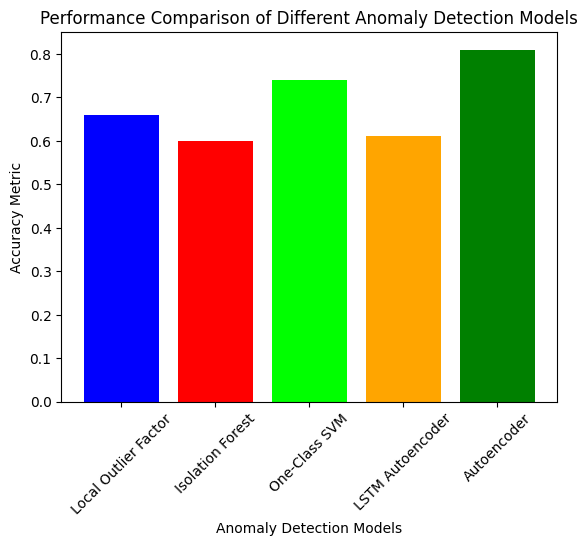

In [11]:
# Plot for algorithms with Accuracy

import matplotlib.pyplot as plt

algorithm_names = ["Local Outlier Factor", "Isolation Forest", "One-Class SVM", "LSTM Autoencoder", "Autoencoder"]

metric_values = [0.66,0.60,0.74 ,0.61 ,0.81]

plt.bar(algorithm_names, metric_values, color=['blue', 'red', 'lime', 'orange', 'green'])
plt.xlabel('Anomaly Detection Models')
plt.ylabel('Accuracy Metric')
plt.title('Performance Comparison of Different Anomaly Detection Models')
plt.xticks(rotation=45)
plt.show()

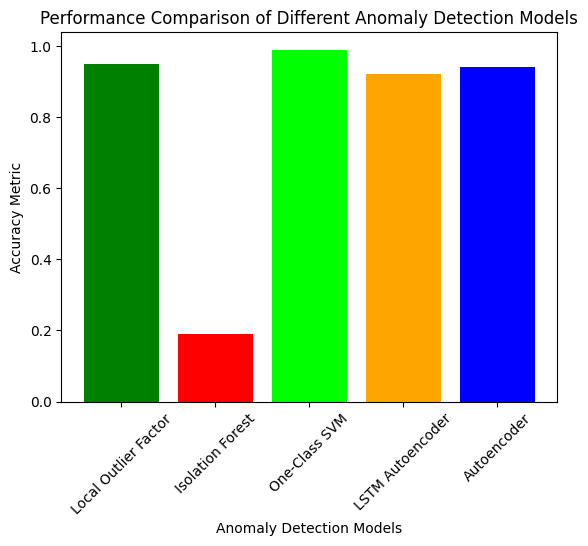

In [7]:
# Plot for algorithms with Recall

import matplotlib.pyplot as plt

algorithm_names = ["Local Outlier Factor", "Isolation Forest", "One-Class SVM", "LSTM Autoencoder", "Autoencoder"]

metric_values = [0.95, 0.19, 0.99, 0.92, 0.94]

plt.bar(algorithm_names, metric_values, color=['green', 'red', 'lime', 'orange', 'blue'])
plt.xlabel('Anomaly Detection Models')
plt.ylabel('Accuracy Metric')
plt.title('Performance Comparison of Different Anomaly Detection Models')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Autoencoder with 10% anomalies and one_hot=True

autoenc = Autoencoder([96, 64, 32, 24, 16, 8], [8, 16, 24, 32, 64, 96], nn.ReLU(), nn.Sigmoid())

hp = Hparams(batch_size=8, n_epochs=128, anomaly_generation_ratio=10, clean_test_data_ratio=0.3, learning_rate=0.1, window_size=8, window_slide=1, one_hot=True)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))

clean_df: 8890 anomalous_df: 729
12
Epoch 1 training loss: 0.07836276292800903
Epoch 2 training loss: 0.07754524797201157
Epoch 3 training loss: 0.07745422422885895
Epoch 4 training loss: 0.07746409624814987
Epoch 5 training loss: 0.07742595672607422
Epoch 6 training loss: 0.07742536813020706
Epoch 7 training loss: 0.07751432806253433
Epoch 8 training loss: 0.0775236040353775
Epoch 9 training loss: 0.07753631472587585
Epoch 10 training loss: 0.0775417909026146
Epoch 11 training loss: 0.07748011499643326
Epoch 12 training loss: 0.0774666965007782
Epoch 13 training loss: 0.07744150608778
Epoch 14 training loss: 0.07743609696626663
Epoch 15 training loss: 0.07757815718650818
Epoch 16 training loss: 0.07755087316036224
Epoch 17 training loss: 0.07752357423305511
Epoch 18 training loss: 0.07744619250297546
Epoch 19 training loss: 0.07757273316383362
Epoch 20 training loss: 0.07744909822940826
Epoch 21 training loss: 0.07758618891239166
Epoch 22 training loss: 0.07743437588214874
Epoch 23 tr

In [ ]:
# Autoencoder with 10% anomalies and one_hot=True

autoenc = Autoencoder([96, 64, 32, 24, 16, 8], [8, 16, 24, 32, 64, 96], nn.ReLU(), nn.Sigmoid())

hp = Hparams(batch_size=8, n_epochs=256, anomaly_generation_ratio=10, clean_test_data_ratio=0.3, learning_rate=0.1, window_size=8, window_slide=1, one_hot=True)
(avg, cm) = model_train_eval(autoenc, data, hp)
print(avg)
print(cm)
(tp, tn, fp, fn) = (cm[1][1], cm[0][0], cm[0][1], cm[1][0])
print("Accuracy:", (tp + tn) / (tp + tn + fp + fn))
print("Precision: ", tp / (tp + fp))
print("Recall: ", tp / (tp + fn))
print("F1: ", 2 * tp / (2 * tp + fp + fn))